<a href="https://colab.research.google.com/github/gaurvviii/RL/blob/main/exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

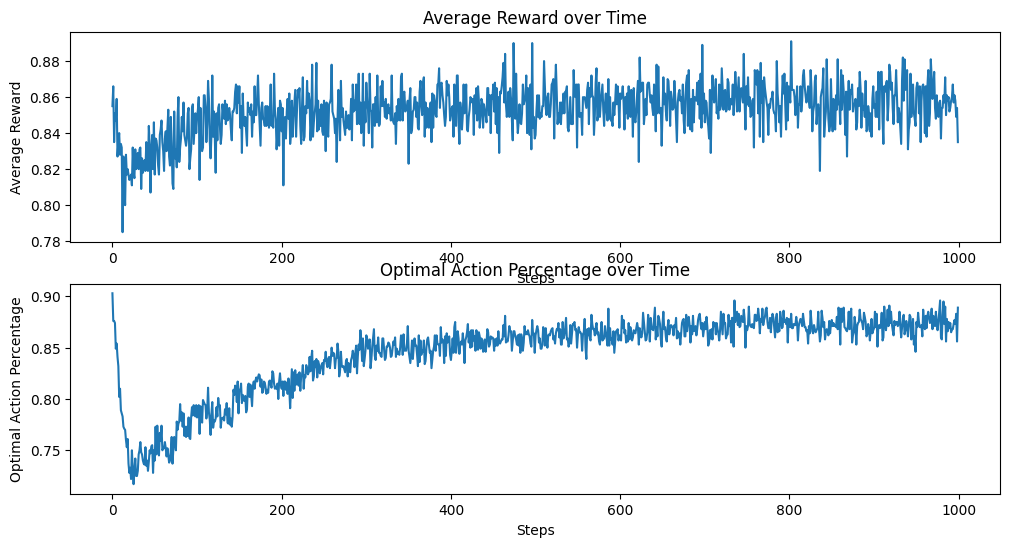

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms (bandit machines)
num_arms = 10

# True reward probabilities for each arm (unknown to the agent)
true_rewards = np.random.rand(num_arms)

# Initialize variables
epsilon = 0.1  # Exploration rate
num_episodes = 1000
num_steps = 1000
avg_rewards = np.zeros(num_steps)
optimal_action_count = np.zeros(num_steps)

for episode in range(num_episodes):
    # Q-values for each arm (estimated rewards)
    q_values = np.zeros(num_arms)

    # Number of times each arm has been pulled
    arm_pull_count = np.zeros(num_arms)

    for step in range(num_steps):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            # Explore: Choose a random arm
            action = np.random.randint(num_arms)
        else:
            # Exploit: Choose the arm with the highest estimated reward
            action = np.argmax(q_values)

        # Simulate pulling the selected arm and observe the reward
        reward = np.random.rand() < true_rewards[action]

        # Update estimates and arm pull count
        arm_pull_count[action] += 1
        q_values[action] += (reward - q_values[action]) / arm_pull_count[action]

        # Update average rewards and optimal action count
        avg_rewards[step] += (reward - avg_rewards[step]) / (episode + 1)
        if action == np.argmax(true_rewards):
            optimal_action_count[step] += 1

# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(avg_rewards)
plt.title('Average Reward over Time')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.subplot(2, 1, 2)
plt.plot(optimal_action_count / num_episodes)
plt.title('Optimal Action Percentage over Time')
plt.xlabel('Steps')
plt.ylabel('Optimal Action Percentage')
plt.show()
